### **Rendering component declaration for `highway-env`**

__This section declares all the necessary import statements for rendering display on Google colab server and package installation commands for running highway-env.__

__Note: These import statements are different from the ones used in default OpenAI environments. Also, we present method to use matplotlib as well as last resort option in case this rendering options stops working in future.__

In [1]:
# Package download statements.
# Note 1: This time we also use ffmpeg package for handling video recording related tasks.
# Note 2: The package version are generic and doesn't require any specific package version downloads.
!pip install git+https://github.com/eleurent/highway-env
!apt-get update
!pip install pyvirtualdisplay
!apt-get install -y xvfb python-opengl ffmpeg
# importing gym and high_env for loading different environment scenarios.
import gym
import highway_env

  Cloning https://github.com/eleurent/highway-env to /tmp/pip-req-build-m83uw0ll
  Running command git clone -q https://github.com/eleurent/highway-env /tmp/pip-req-build-m83uw0ll
     |████████████████████████████████| 11.4MB 355kB/s 
  Created wheel for highway-env: filename=highway_env-1.0.dev0-cp36-none-any.whl size=79932 sha256=75a8f47c99f4018746111cc1b9f687da4afa752dc51107ce94c49cdc76beb5fa
  Stored in directory: /tmp/pip-ephem-wheel-cache-i2pkcgv4/wheels/e6/10/d8/02a077ca221bbac1c6fc12c1370c2f773a8cd602d4be3df0cc
Successfully built highway-env
Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:6 https://d

In [18]:
# Similar, to earlier rendering procedures for creating virtual display.
from IPython import display as ipythondisplay
from pyvirtualdisplay import Display
from gym.wrappers import Monitor
from pathlib import Path
import base64

# Declaing display screen size for rendering highway-env environment.
display = Display(visible=0, size=(1366, 768))
display.start()

# These functions are also available in '/highway-env/scripts/' directory in utils.py
# file of highway-env github repository. These, can be directly accessed with below
# commands but we are using these functions here to fix a specific size of recorded videos.
# Note: commands are stated below for directly using these functions.
# Also, we have changed these functions slightly. Therefore, refer documentation.

# !git clone https://github.com/eleurent/highway-env.git
# import sys
# sys.path.insert(0, './highway-env/scripts/')
# from utils import record_videos, show_videos, capture_intermediate_frames

def wrap_env(env):
    return Monitor(env, './video', force=True, video_callable=lambda episode: True)


def show_video():
    html = []
    for mp4 in Path('./video').glob("*.mp4"):
        video_b64 = base64.b64encode(mp4.read_bytes())
        html.append('''<video alt="{}" autoplay
                      loop controls style="height: 150px;">
                      <source src="data:video/mp4;base64,{}" type="video/mp4" />
                 </video>'''.format(mp4, video_b64.decode('ascii')))
    ipythondisplay.display(ipythondisplay.HTML(data="<br>".join(html)))


def capture_intermediate_frames(env):
    env.unwrapped.automatic_rendering_callback = env.video_recorder.capture_frame

In [19]:
env = gym.make("merge-v0")
env = wrap_env(env)
obs, done = env.reset(), False
capture_intermediate_frames(env)
for _ in range(10):
    action = env.action_space.sample()
    obs, reward, done, info = env.step(action)
    # env.render(), using render() function here will produce error.
    # As we are already making a 'automatic_rendering_callback' to capture intermediate frames.
env.close()
show_video()

In [20]:
!zip -r /content/file.zip /content/video
from google.colab import files
files.download("/content/file.zip")

updating: content/video/ (stored 0%)
  adding: content/video/openaigym.episode_batch.7.100.stats.json (deflated 30%)
  adding: content/video/openaigym.video.7.100.video000000.mp4 (deflated 13%)
  adding: content/video/openaigym.video.7.100.video000000.meta.json (deflated 60%)
  adding: content/video/openaigym.manifest.7.100.manifest.json (deflated 39%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Rendering `highway-env` with matplotlib package**

__In this method renders graphics from gym environment into matplotlib graph figures that are static in nature. We loop over these figures to create video like effect.__

__Note: The package download process is same as above stated method. But, here we need to render the environment as we are not making automatic rendering calls.__

In [21]:
import gym
import highway_env
from matplotlib import pyplot as plt
%matplotlib inline

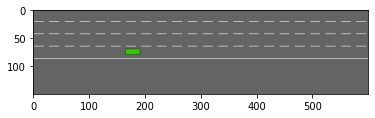

In [22]:
env = wrap_env(gym.make('highway-v0'))
env.reset()
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)

for _ in range(15):
    action = env.action_space.sample()
    obs, reward, done, info = env.step(action)
    screen = env.render(mode='rgb_array')
    plt.imshow(screen)
    ipythondisplay.clear_output(wait=True)
    ipythondisplay.display(plt.gcf())
ipythondisplay.clear_output(wait=True)
env.close()